# EDA Car Dataset
<br>Team Member : Bangun Sagala and Wilvan Dany Aritonang

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [166]:
df = pd.read_csv("car_dataset.csv",encoding='latin1')

In [167]:
df.shape

(11914, 16)

In [168]:
df.ndim

2

In [169]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [171]:
df.ndim

2

In [172]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [173]:
df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0],inplace=True)
df['Engine HP'].fillna(df['Engine HP'].mode()[0],inplace=True)
df['Engine Cylinders'].fillna(df['Engine Cylinders'].mode()[0],inplace=True)
df['Number of Doors'].fillna(df['Number of Doors'].mode()[0],inplace=True)
df['Market Category'].fillna(df['Market Category'].mode()[0],inplace=True)

In [174]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [175]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [181]:
df.duplicated().sum()

715

In [182]:
df.loc[df.duplicated()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
88,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,Crossover,Compact,Coupe,36,26,2009,2000
92,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,Crossover,Compact,Coupe,35,25,2009,2000
94,Nissan,200SX,1998,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,Crossover,Compact,Coupe,35,25,2009,2000
109,Volvo,240,1992,regular unleaded,114.0,4.0,MANUAL,rear wheel drive,4.0,Luxury,Midsize,Sedan,26,19,870,2000
126,BMW,3 Series Gran Turismo,2015,premium unleaded (required),240.0,4.0,AUTOMATIC,all wheel drive,4.0,"Hatchback,Luxury",Midsize,4dr Hatchback,33,22,3916,41850


In [183]:
df.drop_duplicates(keep='first',inplace=True)

In [184]:
df.duplicated().sum()

0

In [185]:
df.loc[df.duplicated()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [186]:
df.shape

(11199, 16)

In [187]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

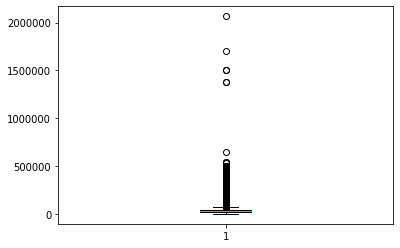

In [188]:
plt.boxplot(df['MSRP'])
plt.show()

In [189]:
q1 = df['MSRP'].quantile(0.25)
q3 = df['MSRP'].quantile(0.75)

iqr = q3-q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

In [190]:
outliers = df[(df['MSRP']>upper_bound)|(df['MSRP']<lower_bound)]
print(len(outliers['MSRP']))

960


In [191]:
outliers.count()

Make                 960
Model                960
Year                 960
Engine Fuel Type     960
Engine HP            960
Engine Cylinders     960
Transmission Type    960
Driven_Wheels        960
Number of Doors      960
Market Category      960
Vehicle Size         960
Vehicle Style        960
highway MPG          960
city mpg             960
Popularity           960
MSRP                 960
dtype: int64

In [192]:
df.loc[(df['MSRP'])>upper_bound,'MSRP'] = upper_bound

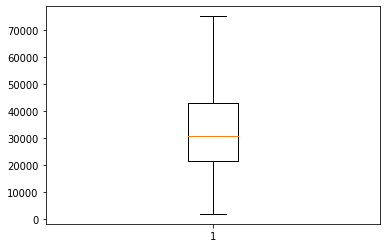

In [193]:
plt.boxplot(df['MSRP'])
plt.show()

In [194]:
outliers = df[(df['MSRP']>upper_bound)|(df['MSRP']<lower_bound)]
print(len(outliers['MSRP']))

0


In [195]:
outliers.count()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

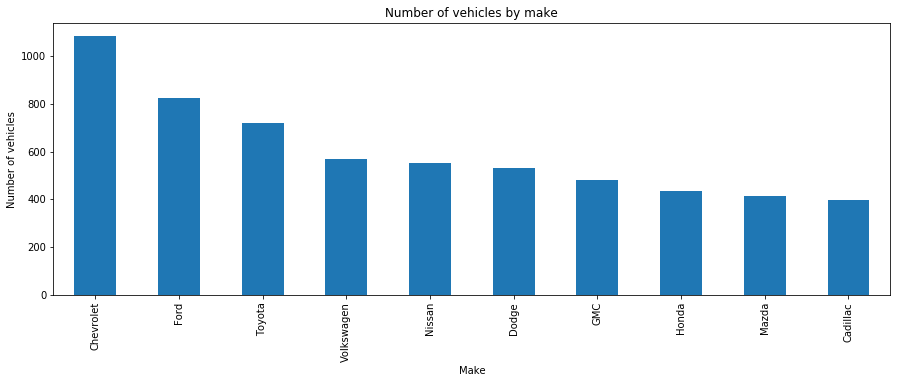

In [196]:
df.Make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');


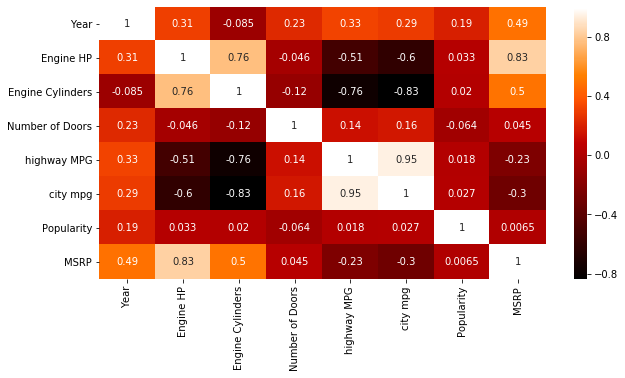

In [197]:
plt.figure(figsize=(10,5))
c= df.corr(method='spearman')
sns.heatmap(c,cmap='gist_heat',annot=True);

In [220]:
df.Year.unique()

array([2011, 2012, 2013, 1992, 1993, 1994, 2017, 1991, 2016, 1990, 2015,
       1996, 1997, 1998, 2014, 1999, 2002, 2003, 2004, 1995, 2007, 2008,
       2009, 2001, 2010, 2000, 2005, 2006], dtype=int64)

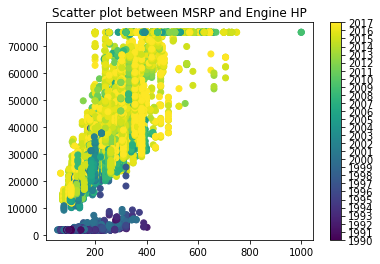

In [237]:
plt.scatter(df['Engine HP'], df['MSRP'], c = df['Year'])
plt.title('Scatter plot between MSRP and Engine HP')
plt.colorbar(ticks=[2011, 2012, 2013, 1992, 1993, 1994, 2017, 1991, 2016, 1990, 2015,
       1996, 1997, 1998, 2014, 1999, 2002, 2003, 2004, 1995, 2007, 2008,
       2009, 2001, 2010, 2000, 2005, 2006]);

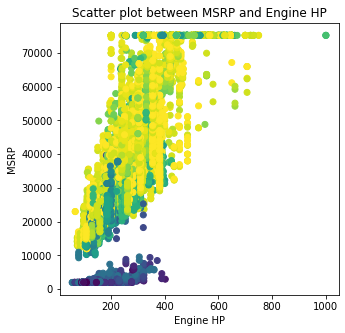

In [247]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['Engine HP'], df['MSRP'], c = df['Year'])
plt.title('Scatter plot between MSRP and Engine HP')
ax.set_xlabel('Engine HP')
ax.set_ylabel('MSRP');

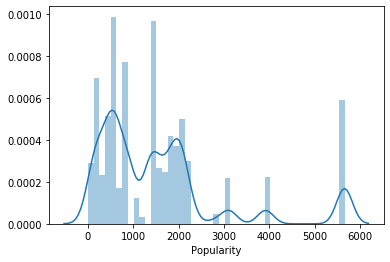

In [16]:
sns.distplot(df.Popularity)
plt.show()

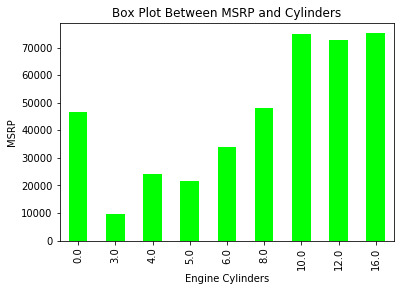

In [241]:
df.groupby('Engine Cylinders')['MSRP'].mean().plot(kind='bar', color = 'lime');
plt.title("Box Plot Between MSRP and Cylinders")
plt.ylabel('MSRP')
plt.xlabel('Engine Cylinders');

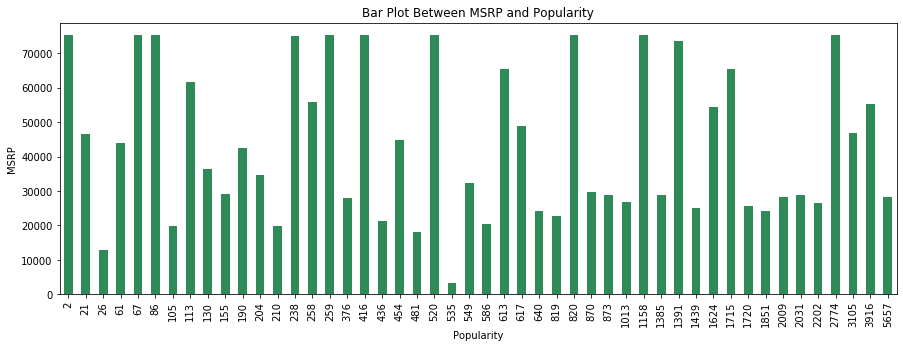

In [256]:
df.groupby('Popularity')['MSRP'].mean().plot(kind='bar', color = 'seagreen', figsize=(15,5));
plt.title("Bar Plot Between MSRP and Popularity")
plt.ylabel('MSRP')
plt.xlabel('Popularity');

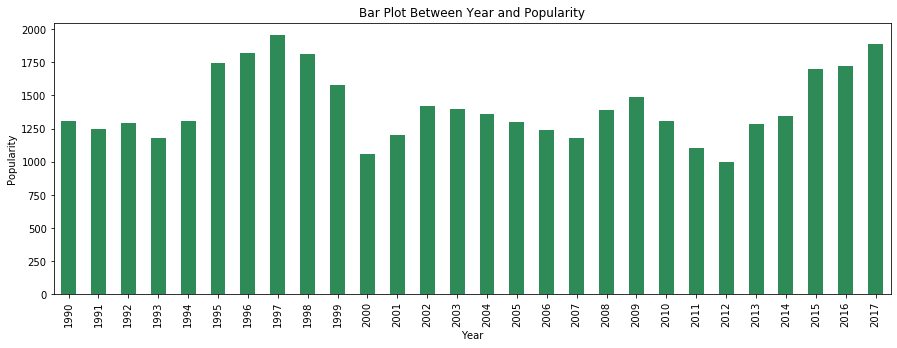

In [251]:
df.groupby('Year')['Popularity'].mean().plot(kind='bar', color = 'seagreen', figsize=(15,5));
plt.title("Bar Plot Between Year and Popularity")
plt.ylabel('Popularity')
plt.xlabel('Year');

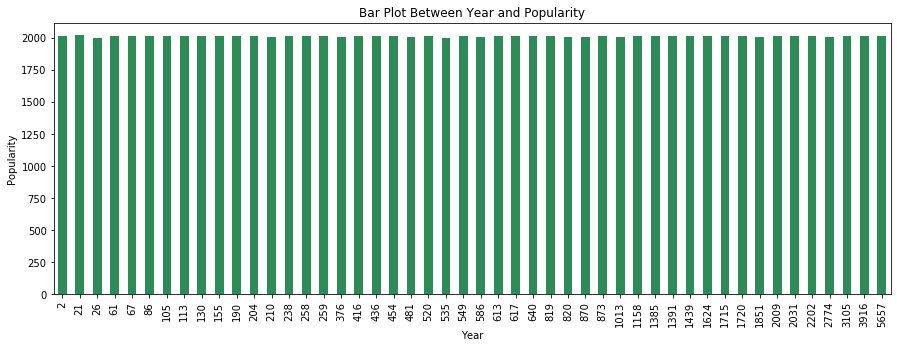

In [252]:
df.groupby('Popularity')['Year'].mean().plot(kind='bar', color = 'seagreen', figsize=(15,5));
plt.title("Bar Plot Between Year and Popularity")
plt.ylabel('Popularity')
plt.xlabel('Year');